# Data Visualization

This notebook will give a short overview of the different audio processing techniques used in speech recognition. Our data is in the raw audio .wav form, so we will need to extract data from it somehow before we can use it in our neural networks.

Let's start by importing some modules and loading in a couple audio files.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Audio as audio
import librosa
import librosa.display

In [2]:
#all clips are sampled with samplerate=16000
SAMPLERATE = 16000

path_stop_1 = '../data/train/stop/raw_audio/0bd689d7_nohash_0.wav'
path_stop_2 = '../data/train/stop/raw_audio/0b56bcfe_nohash_0.wav'

#preserving native sample rate with sr=None
freq_stop_1, _ = librosa.load(path_stop_1, sr=None)
freq_stop_2, _ = librosa.load(path_stop_2, sr=None)

#play audio
display(audio(freq_stop_1, rate=SAMPLERATE))
display(audio(freq_stop_2, rate=SAMPLERATE))

How do we get data from these clips, some sort of numbers we can use? The simplest way is to look at the raw temporal data librosa extracted when it loaded the clips. ```freq_stop_1``` and ```freq_stop_2``` are 1-dimensional arrays of length 16000 (the rate at which the audio was sampled at) which we could potentially use in our analysis.

Let's see what these look like. We'll plot this for both of the samples we extracted above. It is important to note that the y axis is unitless when extracted by librosa, however it does represent amplitude at different points of time.

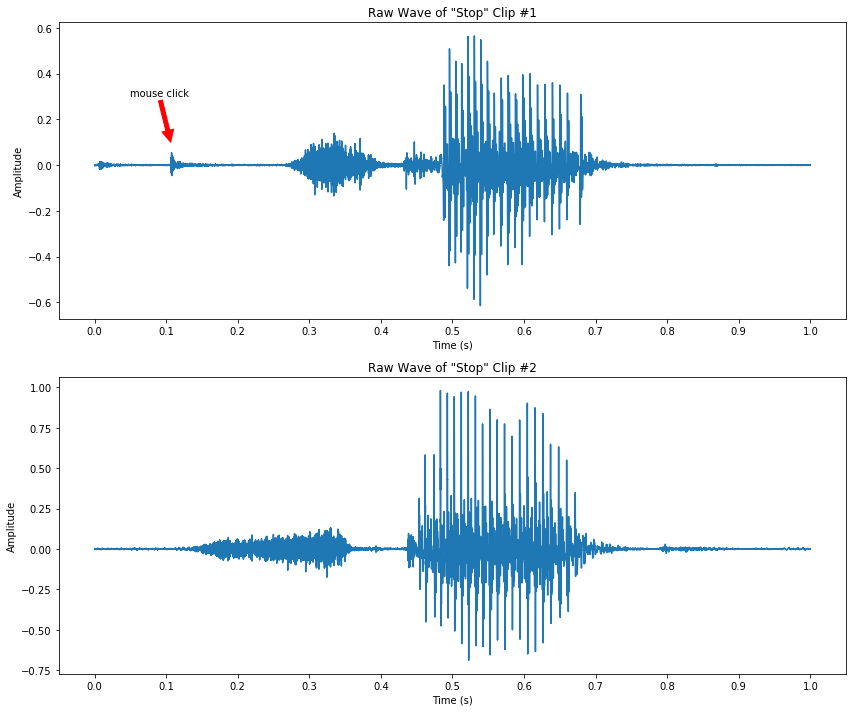

In [3]:
def plot_wav(freq, ax, title='Raw Wave'):
    """
    Takes in frequencies from librosa.load() and plots raw wave form of audio on a given axes
    """  
    ax.plot(freq)
    ax.set_title(title)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_xticks(np.linspace(0, SAMPLERATE, 11))
    ax.set_xticklabels(np.linspace(0, 1, 11).round(2))
    return ax
    

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
plot_wav(freq_stop_1, ax[0], 'Raw Wave of "Stop" Clip #1')
plot_wav(freq_stop_2, ax[1], 'Raw Wave of "Stop" Clip #2' )
ax[0].annotate('mouse click', xy=(1700, .1), xytext=(800, .3), arrowprops={'color':'r'})
plt.tight_layout()
plt.show()

As we can see, these two samples are quite similar, even though they are spoken by different people. This might not always be the case though, even when the word spoken is the same. Some clips may be faster or slower than others, could start sooner or later in the recording time, or contain background noise. For example, even the small mouse click from the first sample can be seen in the first chart. Louder and more consistent background noises and other distortions could completely change the shape in a simple data extraction method like this. 

Let's plot two different samples of the word "off" and see how they look.

In [4]:
path_off_1 = '../data/train/off/raw_audio/00b01445_nohash_0.wav'
path_off_2 = '../data/train/off/raw_audio/0b09edd3_nohash_0.wav'

#preserving native sample rate with sr=None
freq_off_1, _ = librosa.load(path_off_1, sr=None)
freq_off_2, _ = librosa.load(path_off_2, sr=None)

#play audio
display(audio(freq_off_1, rate=SAMPLERATE))
display(audio(freq_off_2, rate=SAMPLERATE))

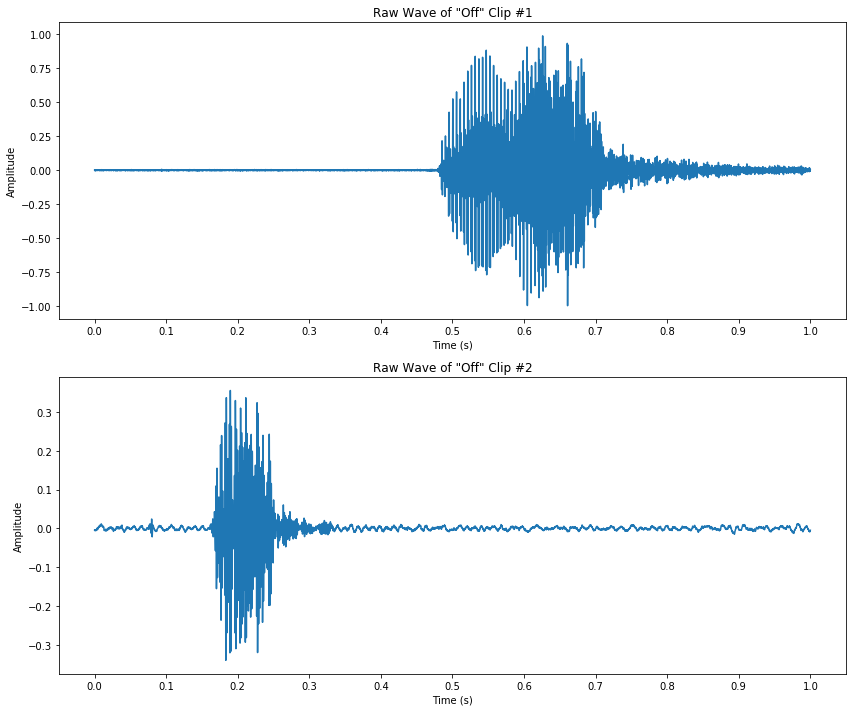

In [5]:
#plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
plot_wav(freq_off_1, ax[0], 'Raw Wave of "Off" Clip #1')
plot_wav(freq_off_2, ax[1], 'Raw Wave of "Off" Clip #2' )
plt.tight_layout()
plt.show()

Despite both of these words being "off", their shape is completely different. This basic extraction method is clearly not going to be detailed enough to get good results from a machine learning classifier.

There are a couple other more sophisticated methods of data extraction with speech data, which could help avoid these distortions, give more detail in the data, and in the end give us a better classification result. Let's look at extracting the wav files into log mel-spectrograms now. These will be "images" that we could use image processing techniques on that will show us how loud different frequencies are at different points of time.

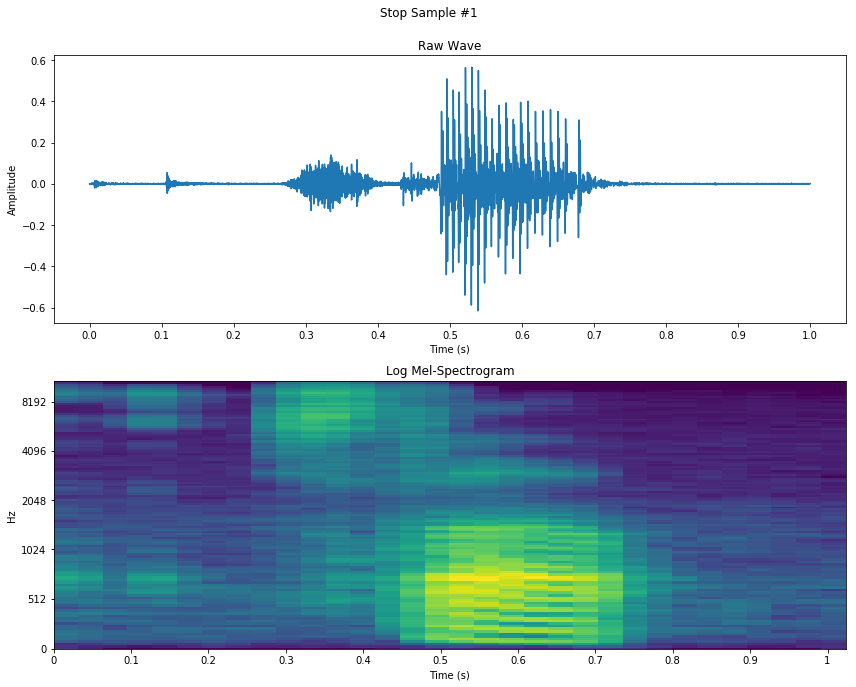

In [6]:
def plot_log_spec(freq, ax, title='Log Mel-Spectrogram'):
    """
    Takes in frequencies from librosa.load() and plots log mel-spectrogram of audio on a given axes
    """ 
    spec = librosa.feature.melspectrogram(freq, sr=SAMPLERATE)
    log_spec = librosa.power_to_db(spec, ref=np.max)
    librosa.display.specshow(log_spec, sr=SAMPLERATE, x_axis='time',
                             y_axis='mel', cmap='viridis', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Time (s)')
    ax.set_xticks(np.linspace(0, 1, 11))
    return ax


fig, ax = plt.subplots(2, 1, figsize=(12, 10))
plot_wav(freq_stop_1, ax[0])
plot_log_spec(freq_stop_1, ax[1])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Stop Sample #1')
plt.show()

The more yellow colors represent a louder decibel at that point of time at a given Hertz. Already we can see the benefit of the added Hertz dimension - the "s" sound lies in the higher frequencies while the rest of the word lies in the lower frequencies. This added detail will give us more accurate classifications than the raw wave form.

Let's try plotting the two "off" samples with this method.

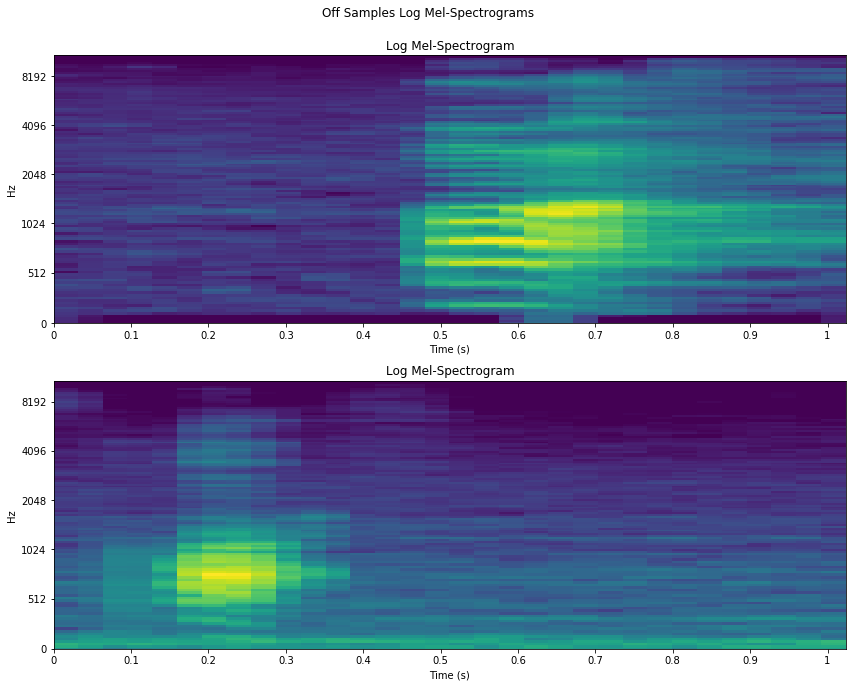

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
plot_log_spec(freq_off_1, ax[0])
plot_log_spec(freq_off_2, ax[1])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Off Samples Log Mel-Spectrograms')
plt.show()

These still look quite different. However, the log mel-spectrograms help us see that the two samples are within the same frequencies, while starting at different points in time. With enough data, a neural network will be able to classify with these much more accurately than the raw wave form.

The final method of data extraction we will use is the Mel Frequency Cepstral Coefficient (MFCC). MFCCs are a feature widely used in speech recognition, and are designed to extract information about linguistic content from audio while ignoring background noise. These are used in most speech recognition systems today, and so we will use these for our final model.

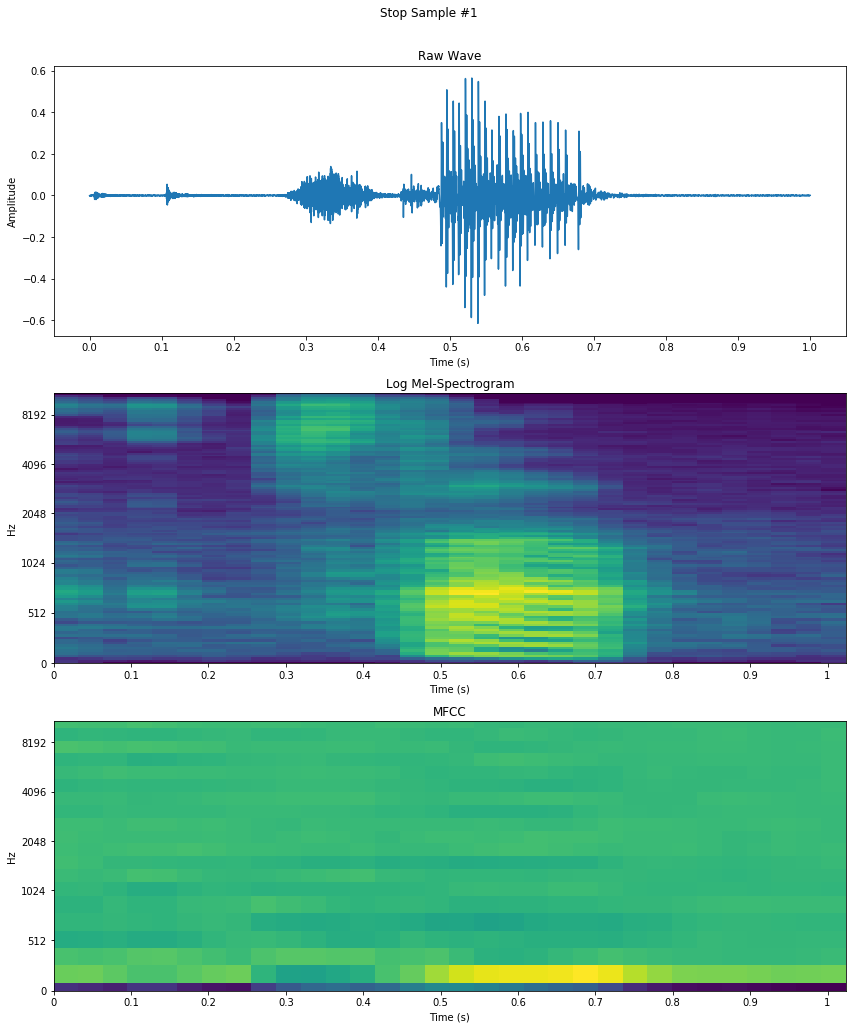

In [8]:
def plot_mfcc(freq, ax, title='MFCC'):
    """
    Takes in frequencies from librosa.load() and plots MFCCs of audio on a given axes
    """ 
    mfcc = librosa.feature.mfcc(freq, sr=SAMPLERATE)
    librosa.display.specshow(mfcc, sr=SAMPLERATE, x_axis='time',
                             y_axis='mel', cmap='viridis', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Time (s)')
    ax.set_xticks(np.linspace(0, 1, 11))
    return ax

fig, ax = plt.subplots(3, 1, figsize=(12, 15))
plot_wav(freq_stop_1, ax[0])
plot_log_spec(freq_stop_1, ax[1])
plot_mfcc(freq_stop_1, ax[2])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Stop Sample #1')
plt.show()

Although we appear to lose some information, these features will probably work the best when it comes to classification with neural networks. 

In this notebook we explored a few different options for extracting data from raw audio files. Although using MFCCs will most likely perform the best, we will also implement a network using the log mel-spectrograms and use the one with the best results.